# CS 457 -  Homework Assignment 10: Clustering
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk




In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Reading data from csv file into dataframe
df = pd.read_csv('McDonaldsMenu.csv')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

## Question 1,2

In [3]:
# Cleaning the data by dropping columns category, item and serving size.
# I have dropped these columns because we require numerical data for meaningful clustering in this case

df.drop(['Serving Size','Category','Item'],axis=1,inplace=True)
df.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10


## Question 3

In [4]:
#scaling values before clustering

scaler = MinMaxScaler()
df_s = scaler.fit_transform(df)
df_s[1:5]

array([[0.13297872, 0.06603774, 0.06779661, 0.06593407, 0.15      ,
        0.14705882, 0.        , 0.04347826, 0.04166667, 0.21388889,
        0.21333333, 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.0234375 , 0.20689655, 0.03529412, 0.        , 0.35714286,
        0.2       ],
       [0.19680851, 0.18867925, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.07826087, 0.078125  , 0.21666667,
        0.22      , 0.20567376, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.16091954, 0.04705882, 0.        , 0.35714286,
        0.25      ],
       [0.2393617 , 0.23584906, 0.23728814, 0.23626374, 0.5       ,
        0.50980392, 0.        , 0.49565217, 0.49479167, 0.23888889,
        0.24      , 0.21276596, 0.21276596, 0.57142857, 0.60714286,
        0.015625  , 0.24137931, 0.08823529, 0.        , 0.42857143,
        0.375     ],
       [0.21276596, 0.19811321, 0.19491525, 0.19230769, 0.4       ,
        0.41176471, 0.        , 0.08695652, 0.0833333

# Question 4

In [5]:
#Finding the optimum number of clusters for k-means clustering
wss = []
sil_score = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, max_iter = 300, random_state = 100)
    kmeans.fit(df_s)
    wss.append(kmeans.inertia_)
    if i > 1:
        labels = kmeans.labels_
        sil_score.append(silhouette_score(df_s, labels))

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avo

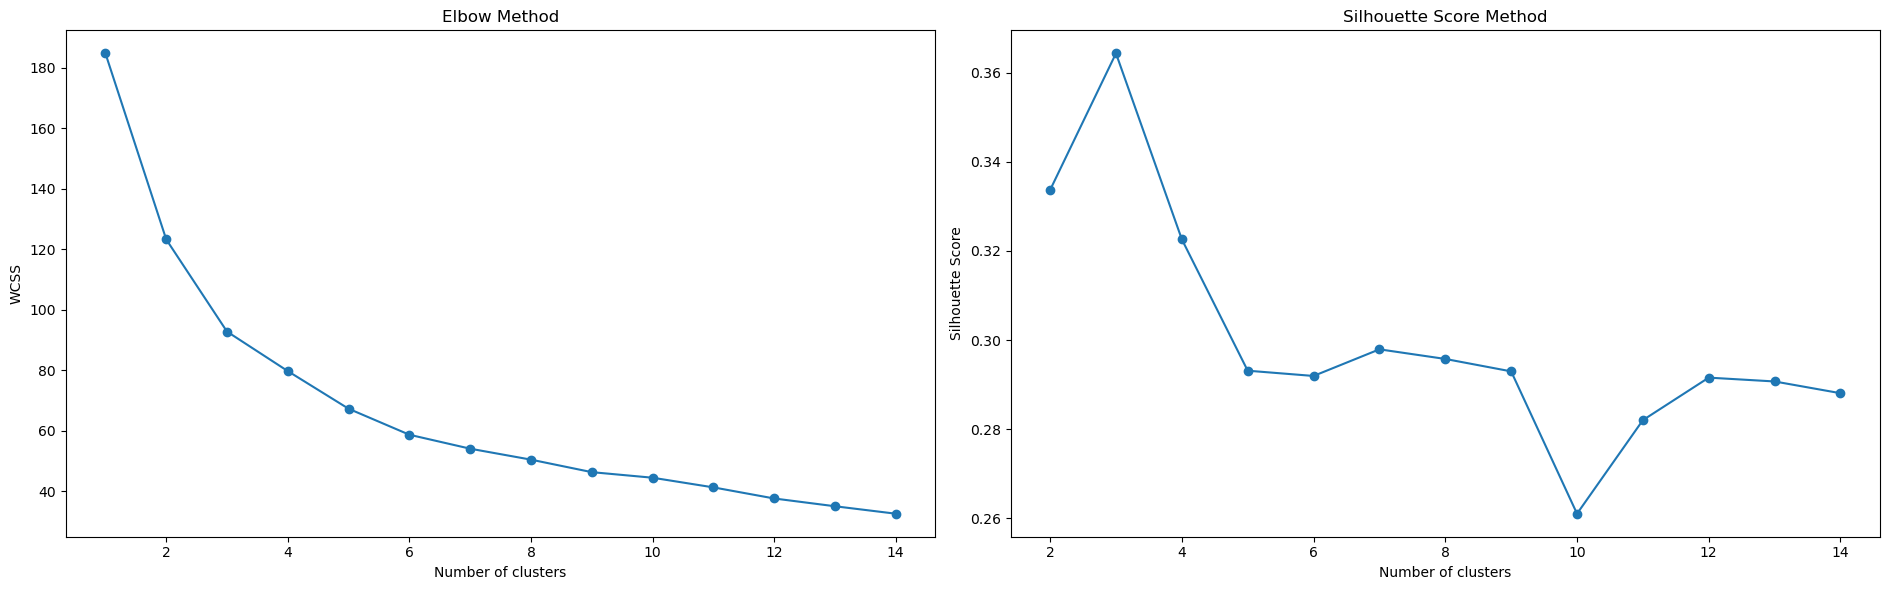

In [6]:
# Plotting WSS (Elbow Method)
plt.figure(figsize=(19, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, 15), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), sil_score, marker='o')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

#### From the elbow method graph and silhouette score graph, we can conclude that optimal number of clusters is 3. 

#### In elbow method graph, we can see that the value become less drastically changing after reaching k = 3, so that is optimal value from this graph.

#### Moreover in silhoutte score graph, k= 3 has the coefficient value closest to 1, so it's verify our choice from elbow method graph

## Question 5

In [7]:
# Performing clustering with optimal numbers of cluster

kmeans = KMeans(n_clusters = 3, max_iter = 300, random_state = 100)
result = kmeans.fit_predict(df_s)

result

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0])

## Question 6

Text(0.5, 1.0, 'The original dataset')

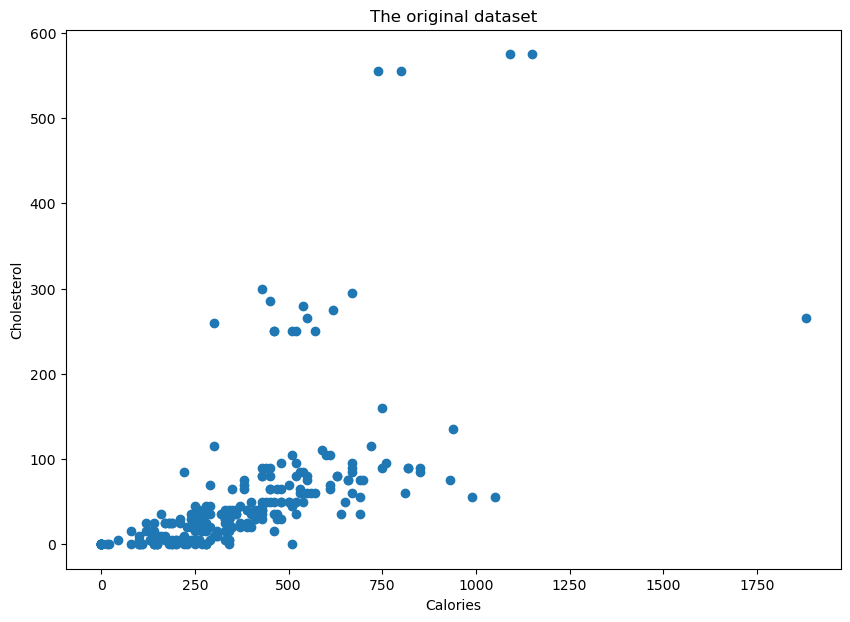

In [8]:
# Visualizing the clustering result

# Taking any two features for visualisation. x = calories y= cholestrol 

plt.figure(figsize=(10,7))
plt.scatter(x=df['Calories'],y=df['Cholesterol'])
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.title("The original dataset")


#### The above scatter plot shows that there is a positive relation between the variables and there are also some outliers in the data. Overall, the data is well spread in a certain range. This plot uses the data before clustering

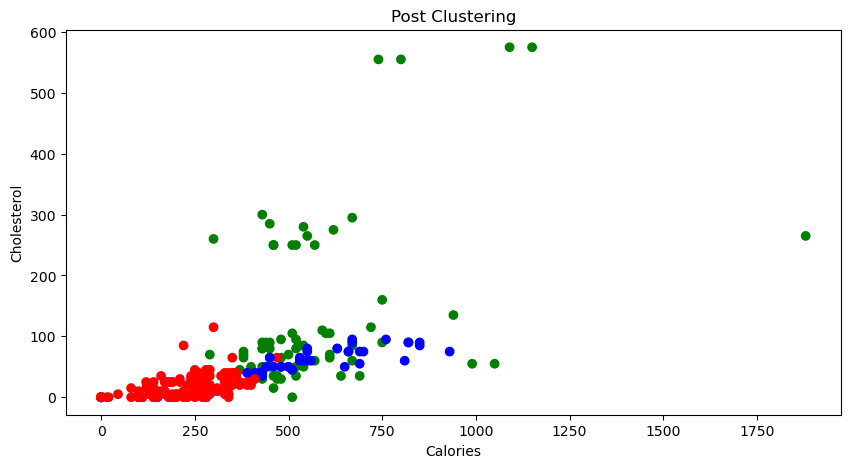

In [9]:
#Visualisation after clustering

plt.figure(figsize=(10,5))
colors = np.array(['red', 'green', 'blue', 'yellow'])
plt.scatter(x = df['Calories'], y = df['Cholesterol'], c=colors[kmeans.labels_])
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.title('Post Clustering')
plt.show()

#### The above scatter plot is colour-coded according to cluster made in our model. This shows that the data is divided into three groups based on the cholestrol and energy. The red cluster shows the low cholestrol with low calories and green shows high cholestrol with high energy whereas blue data is intermediate between them.

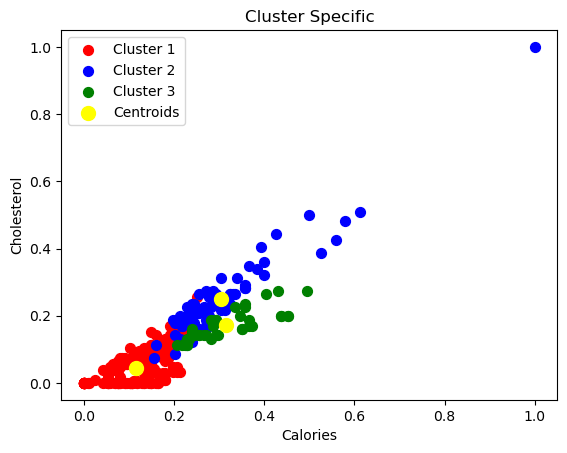

In [10]:
plt.scatter(df_s[result == 0, 0], df_s[result == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(df_s[result == 1, 0], df_s[result == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(df_s[result == 2, 0], df_s[result == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.xlabel('Calories')
plt.ylabel('Cholesterol')
plt.title('Cluster Specific')
plt.legend()
plt.show()

#### This plot shows that the our three clusters are well centered around a central node/center.

## Question 7

In [11]:
# Creating cluster specific dataframes
# we are dividing data frames according to the clusters formed in our model.
# The first dataframe is about the low cholestrol with low calorie
# The second is high cholestrol with high energy
# whereas the third frame is about low cholestrol with high energy.

C1 = df.iloc[result == 0, :]
C2 = df.iloc[result == 1, :]
C3 = df.iloc[result == 2, :]

C1.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
1,250,70,8.0,12,3.0,15,0.0,25,8,770,...,30,10,4,17,3,18,6,0,25,8
35,350,80,9.0,13,2.0,9,0.0,20,7,590,...,60,20,3,10,14,8,0,0,15,15
37,300,150,16.0,25,7.0,33,0.0,115,38,790,...,26,9,1,5,2,12,10,2,15,15
38,150,80,9.0,14,1.5,6,0.0,0,0,310,...,15,5,2,6,0,1,0,2,0,2
40,290,35,4.0,6,1.5,8,0.0,5,2,160,...,58,19,5,19,32,5,2,130,10,10


In [12]:
C2.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,300,120,13.0,20,5.0,25,0.0,260,87,750,...,31,10,4,17,3,17,10,0,25,15
2,370,200,23.0,35,8.0,42,0.0,45,15,780,...,29,10,4,17,2,14,8,0,25,10
3,450,250,28.0,43,10.0,52,0.0,285,95,860,...,30,10,4,17,2,21,15,0,30,15
4,400,210,23.0,35,8.0,42,0.0,50,16,880,...,30,10,4,17,2,21,6,0,25,10
5,430,210,23.0,36,9.0,46,1.0,300,100,960,...,31,10,4,18,3,26,15,2,30,20


In [13]:
C3.head()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
153,430,120,14.0,21,8.0,39,0.0,40,14,180,...,62,21,1,6,59,15,15,0,50,2
156,430,120,14.0,21,8.0,39,0.0,40,14,180,...,62,21,1,6,58,15,15,0,50,2
159,420,120,14.0,21,8.0,39,0.0,40,14,190,...,60,20,1,6,56,15,15,0,50,2
179,410,120,14.0,21,8.0,40,0.0,40,14,190,...,60,20,2,8,53,13,10,0,40,6
180,500,150,17.0,26,10.0,49,0.5,50,17,240,...,72,24,2,10,63,16,15,0,50,8


## Question 8

In [14]:
C1.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,...,151.000000,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,216.357616,47.384106,5.324503,8.185430,2.423841,11.966887,0.003311,16.887417,5.761589,183.708609,...,35.576159,11.86755,1.019868,4.000000,27.536424,7.086093,9.529801,10.125828,16.556291,3.092715
std,114.587570,51.613417,5.748101,8.776031,2.521738,12.339323,0.040689,18.227650,6.160853,226.476241,...,20.632478,6.90186,1.202609,4.753946,21.936507,6.403062,21.610741,33.400460,16.630749,4.325661
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,140.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,...,21.500000,7.00000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,2.000000,0.000000
50%,240.000000,35.000000,4.000000,6.000000,2.000000,10.000000,0.000000,10.000000,3.000000,125.000000,...,38.000000,13.00000,1.000000,3.000000,27.000000,7.000000,4.000000,0.000000,10.000000,2.000000
75%,300.000000,80.000000,9.000000,14.000000,4.500000,22.000000,0.000000,30.000000,9.500000,180.000000,...,50.000000,17.00000,1.000000,6.000000,45.000000,12.000000,10.000000,2.000000,30.000000,6.000000
max,470.000000,270.000000,30.000000,45.000000,8.000000,39.000000,0.500000,115.000000,38.000000,990.000000,...,79.000000,26.00000,6.000000,23.000000,76.000000,29.000000,170.000000,240.000000,60.000000,20.000000


<Axes: >

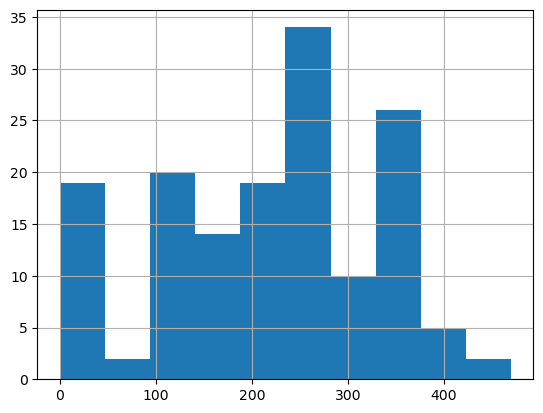

In [15]:
C1['Calories'].hist()

<Axes: >

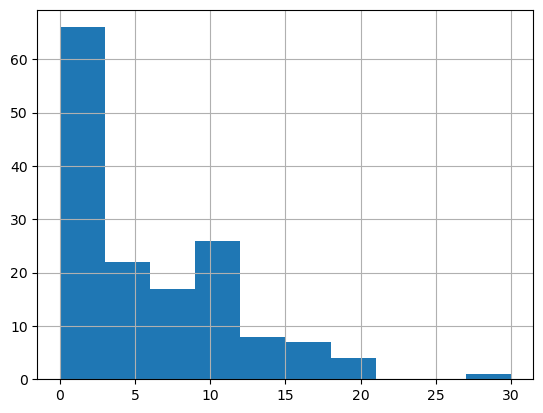

In [16]:
C1['Total Fat'].hist()

<Axes: >

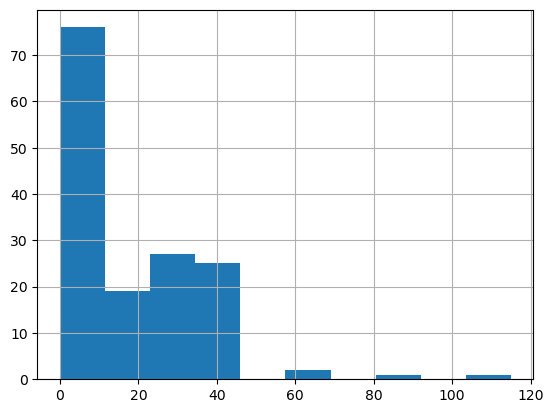

In [17]:
C1['Cholesterol'].hist()

#### Cluster 1 presents a glimpse into a collection of food items characterized by their nutritional moderation. With an average calorie count  around 216, these items strike a balance between energy provision and caloric , making them a potentially ideal choice for those mindful of their daily intake. The fat content, particularly noteworthy at only about 5.32, suggests a number of options that could be friendly to heart health without compromising on taste. Cholesterol levels, averaging a modest 16.88 mg per serving, align with the cluster's theme of moderation, possibly indicating a selection of items that are more conducive to maintaining healthy cholesterol levels. The carbohydrate content, representing about 35.57% of the daily value, provides enough energy for the body's needs without overeating. 

#### This cluster might be the go-to category for health-conscious consumers who seek a diet that supports a balanced lifestyle without the extreme restriction for healthy diet.

In [18]:
C2.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,571.250000,266.250000,29.597222,45.638889,10.250000,51.388889,0.333333,130.000000,43.333333,1291.805556,...,50.125000,16.708333,3.291667,13.180556,8.222222,26.375000,18.708333,9.583333,18.236111,19.180556
std,232.996025,134.786608,15.025480,23.147601,4.195907,20.986619,0.562940,134.452463,44.887339,463.180452,...,20.271355,6.772849,1.336777,5.549588,5.672325,11.301798,32.964957,11.428590,7.755948,6.832661
min,290.000000,80.000000,8.000000,13.000000,2.500000,13.000000,0.000000,0.000000,0.000000,290.000000,...,22.000000,7.000000,2.000000,6.000000,0.000000,6.000000,0.000000,0.000000,2.000000,8.000000
25%,447.500000,197.500000,22.000000,33.000000,7.750000,39.000000,0.000000,50.000000,16.750000,1030.000000,...,38.750000,13.000000,2.000000,9.000000,3.000000,20.000000,4.000000,2.000000,15.000000,15.000000
50%,510.000000,235.000000,26.000000,40.000000,10.000000,48.000000,0.000000,80.000000,27.000000,1260.000000,...,45.500000,15.000000,3.000000,12.000000,7.000000,25.000000,8.000000,8.000000,20.000000,20.000000
75%,612.500000,290.000000,32.250000,49.250000,13.000000,64.250000,0.500000,141.250000,46.250000,1470.000000,...,56.000000,19.000000,4.000000,15.000000,12.000000,32.000000,15.000000,15.000000,25.000000,20.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,101.000000,2.500000,575.000000,192.000000,3600.000000,...,118.000000,39.000000,7.000000,28.000000,32.000000,87.000000,170.000000,70.000000,30.000000,40.000000


<Axes: >

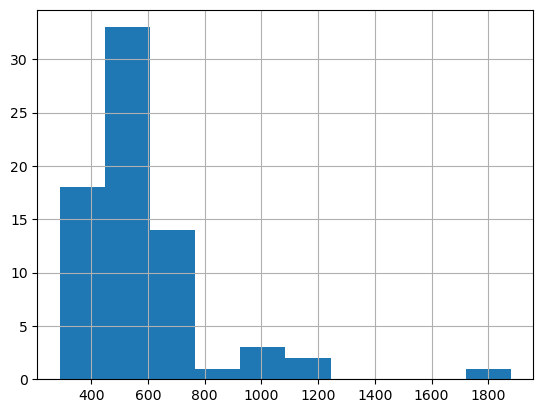

In [19]:
C2['Calories'].hist()

<Axes: >

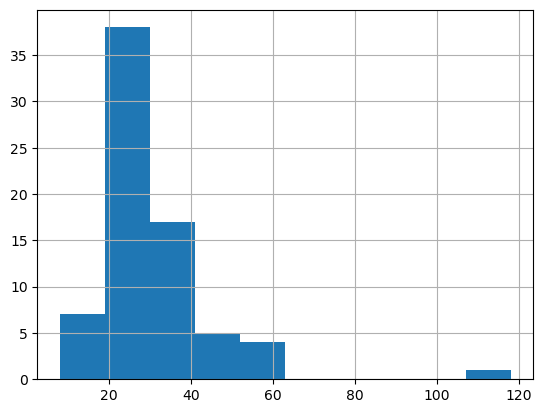

In [20]:
C2['Total Fat'].hist()

<Axes: >

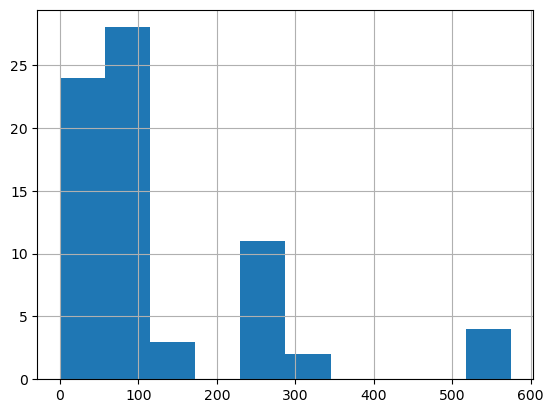

In [21]:
C2['Cholesterol'].hist()

#### Firstly, we're looking at an average calorie count which is too high about 571 calories. If you're the one who tracks your daily intake, this number might make you reconsider your order as this cluster is for those days when you treat yourself.

#### Then, there's the total fat. With an average of nearly 30, these items are rich, creamy, or just downright fatty. But remember, not all fats are villains in our diet story; sometimes, they're the unsung heroes that make our meals satisfying. So while these foods might be higher in fat, they could be giving us those happy meal-time vibes.

#### Let's not skip over cholesterol – the average here is 130 mg, which is about 43% of what you're supposed to have in a day. These are the foods you might find on a cheat day menu, and they're likely full of flavor. But as with any good plot twist, there's a catch – too much cholesterol can lead to heart-stopping cliffhangers, and I mean that quite literally.

In [22]:
C3.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,...,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.0,37.000000,37.000000
mean,593.243243,181.621622,20.216216,31.081081,12.378378,61.729730,0.770270,64.189189,21.405405,220.135135,...,89.972973,29.945946,0.891892,3.918919,78.378378,13.486486,19.054054,0.0,44.324324,4.405405
std,149.463003,47.755949,5.218211,8.101366,3.311188,16.992888,0.401293,18.047527,5.856902,68.814227,...,26.349664,8.787447,0.698561,2.994239,21.727289,3.556072,5.507298,0.0,12.481217,3.692782
min,390.000000,120.000000,14.000000,21.000000,8.000000,39.000000,0.000000,35.000000,11.000000,120.000000,...,55.000000,18.000000,0.000000,0.000000,50.000000,7.000000,10.000000,0.0,20.000000,0.000000
25%,460.000000,150.000000,16.000000,25.000000,10.000000,49.000000,0.500000,50.000000,17.000000,180.000000,...,65.000000,22.000000,0.000000,0.000000,59.000000,11.000000,15.000000,0.0,35.000000,2.000000
50%,550.000000,170.000000,19.000000,29.000000,12.000000,60.000000,1.000000,60.000000,21.000000,210.000000,...,86.000000,29.000000,1.000000,4.000000,71.000000,14.000000,20.000000,0.0,45.000000,4.000000
75%,690.000000,210.000000,23.000000,35.000000,15.000000,73.000000,1.000000,75.000000,25.000000,260.000000,...,109.000000,36.000000,1.000000,6.000000,93.000000,15.000000,20.000000,0.0,50.000000,8.000000
max,930.000000,290.000000,33.000000,50.000000,20.000000,102.000000,1.500000,95.000000,32.000000,400.000000,...,141.000000,47.000000,2.000000,10.000000,128.000000,21.000000,30.000000,0.0,70.000000,15.000000


#### This cluster packs a punch with an average of 593 calories, suggesting these foods are energy-dense and could be the go-to for those needing an extra energy boost, maybe for athletes or during finals week. The fat content stands out, averaging over 20%, with saturated fat making up a significant portion, hinting at a hearty and good taste profile. Cholesterol levels average around 64 mg, which is moderate but still requires mindful consumption. These could be the foods that are popular in the dining halls for their satisfying qualities and energy sustenance.

## Question 9

#### Cluster 1: Sensible servings
because it has moderate nutritional value with moderate cholestrol lvl so eaters can eat intake these servings without worrying much about health. 


#### Cluster 2: Cravings 
because this category is more concerned with fullfillment and taste rather than health/nutritions.


#### Cluster 3: Comfort Cuisine
because of its low cholesterol and high calories with signifacant amount of protiens and carbs.